In [1]:
import pandas as pd

In [2]:
df_meta = pd.read_csv('nfl-player-contact-detection/train_video_metadata.csv')
df_helmets = pd.read_csv('nfl-player-contact-detection/train_baseline_helmets.csv')
df_players = pd.read_csv('nfl-player-contact-detection/train_player_tracking.csv')
df_labels = pd.read_csv('nfl-player-contact-detection/train_labels.csv')

In [3]:
df = pd.read_csv('nfl_train.csv')
df.head(5)

,Unnamed: 0,game_play,datetime,nfl_player_id_1,nfl_player_id_2,contact,start_time,frame_number,left_sideline_p1,top_sideline_p1,...,sa_p1,jersey_num_p2,x_p2,y_p2,speed_p2,distance_p2,direction_p2,orientation_p2,acceleration_p2,sa_p2
0,0,58168_003392,2020-09-11 03:01:48.100,38590,43854,0,2020-09-11 03:01:43.134,298,468.0,372.0,...,0.58,57.0,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74
1,1,58168_003392,2020-09-11 03:01:48.100,38590,41257,0,2020-09-11 03:01:43.134,298,468.0,372.0,...,0.58,21.0,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08
2,2,58168_003392,2020-09-11 03:01:48.100,38590,41944,0,2020-09-11 03:01:43.134,298,468.0,372.0,...,0.58,92.0,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
3,3,58168_003392,2020-09-11 03:01:48.100,38590,42386,0,2020-09-11 03:01:43.134,298,468.0,372.0,...,0.58,55.0,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10
4,4,58168_003392,2020-09-11 03:01:48.100,38590,47944,0,2020-09-11 03:01:43.134,298,468.0,372.0,...,0.58,94.0,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23


In [4]:
df['contact_id'] = df_labels['contact_id']
df['step'] = df_labels['step']

In [5]:
df.columns

Index(['Unnamed: 0', 'game_play', 'datetime', 'nfl_player_id_1',
       'nfl_player_id_2', 'contact', 'start_time', 'frame_number',
       'left_sideline_p1', 'top_sideline_p1', 'left_sideline_p2',
       'top_sideline_p2', 'left_endzone_p1', 'top_endzone_p1',
       'left_endzone_p2', 'top_endzone_p2', 'jersey_num_p1', 'x_p1', 'y_p1',
       'speed_p1', 'distance_p1', 'direction_p1', 'orientation_p1',
       'acceleration_p1', 'sa_p1', 'jersey_num_p2', 'x_p2', 'y_p2', 'speed_p2',
       'distance_p2', 'direction_p2', 'orientation_p2', 'acceleration_p2',
       'sa_p2', 'contact_id', 'step'],
      dtype='object')

In [6]:
df.shape

(4721618, 36)

On garde la distance plus les infos sur direction orentation accel etc

In [7]:
import numpy as np

df['dist'] = np.sqrt((df.x_p2 - df.x_p1) ** 2 + (df.y_p2 - df.y_p1) ** 2)

In [8]:
df.game_play.nunique()

240

In [9]:
df = df.sort_values('game_play')

In [10]:
df = df[df.dist < 1.65].copy()

In [11]:
mask = df['game_play'].isin(df['game_play'].unique()[:192])

df_train = df[mask]
df_test = df[~mask]

In [12]:
df_train.shape

(143430, 37)

In [13]:
df_test.shape

(36486, 37)

In [14]:
cols_to_keep = ['game_play', 'datetime', 'nfl_player_id_1', 'nfl_player_id_2', 'jersey_num_p1', 
                'jersey_num_p2', 'speed_p1', 'distance_p1', 'direction_p1', 'orientation_p1',
       'acceleration_p1', 'sa_p1', 'dist', 'speed_p2',
       'distance_p2', 'direction_p2', 'orientation_p2', 'acceleration_p2',
       'sa_p2', 'contact_id', 'step']
target = 'contact'

In [15]:
X_train = df_train[cols_to_keep]
y_train = df_train[target]

X_test = df_test[cols_to_keep]
y_test = df_test[target]

In [16]:
X_train.shape, y_train.shape

((143430, 21), (143430,))

In [17]:
X_test.shape, y_test.shape

((36486, 21), (36486,))

In [18]:
X_train.isna().sum()

game_play          0
datetime           0
nfl_player_id_1    0
nfl_player_id_2    0
jersey_num_p1      0
jersey_num_p2      0
speed_p1           0
distance_p1        0
direction_p1       0
orientation_p1     0
acceleration_p1    0
sa_p1              0
dist               0
speed_p2           0
distance_p2        0
direction_p2       0
orientation_p2     0
acceleration_p2    0
sa_p2              0
contact_id         0
step               0
dtype: int64

In [19]:
X_test.isnull().sum()

game_play          0
datetime           0
nfl_player_id_1    0
nfl_player_id_2    0
jersey_num_p1      0
jersey_num_p2      0
speed_p1           0
distance_p1        0
direction_p1       0
orientation_p1     0
acceleration_p1    0
sa_p1              0
dist               0
speed_p2           0
distance_p2        0
direction_p2       0
orientation_p2     0
acceleration_p2    0
sa_p2              0
contact_id         0
step               0
dtype: int64

In [20]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train.drop(columns=['game_play', 'datetime', 'nfl_player_id_1', 'nfl_player_id_2', 'jersey_num_p1', 
                'jersey_num_p2', 'contact_id', 'step']), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [21]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test.drop(columns=['game_play', 'datetime', 'nfl_player_id_1', 'nfl_player_id_2', 'jersey_num_p1', 
                'jersey_num_p2', 'contact_id', 'step']))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     27218
           1       0.68      0.58      0.63      9268

    accuracy                           0.82     36486
   macro avg       0.77      0.74      0.76     36486
weighted avg       0.82      0.82      0.82     36486



In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[24612  2606]
 [ 3849  5419]]


In [23]:
from sklearn.metrics import matthews_corrcoef, jaccard_score
print(matthews_corrcoef(y_test, y_pred))
print(jaccard_score(y_test, y_pred))

0.5138567174422605
0.45637527370725955


In [24]:
y_probas = model.predict_proba(X_test.drop(columns=['game_play', 'datetime', 'nfl_player_id_1', 'nfl_player_id_2', 'jersey_num_p1', 
                'jersey_num_p2', 'contact_id', 'step']))

In [25]:
y_probas[np.where(y_probas[:,1] > 0.3)].shape

(11925, 2)

In [26]:
y_pred_2 = np.zeros_like(y_pred)
y_pred_2[np.where(y_probas[:,1] > 0.3)] = 1

In [27]:
print(classification_report(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     27218
           1       0.58      0.75      0.66      9268

    accuracy                           0.80     36486
   macro avg       0.75      0.78      0.76     36486
weighted avg       0.82      0.80      0.81     36486

[[22262  4956]
 [ 2299  6969]]


Confusion Matrix:


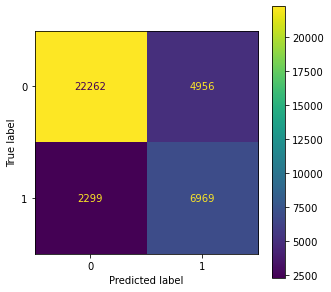

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred_2)
f, ax = plt.subplots(figsize=(5,5))
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(ax=ax)

In [29]:
from sklearn.metrics import matthews_corrcoef, jaccard_score
print(matthews_corrcoef(y_test, y_pred_2))
print(jaccard_score(y_test, y_pred_2))

0.5288525737260267
0.48994656917885265


In [30]:
y_test.value_counts()

0    27218
1     9268
Name: contact, dtype: int64

In [31]:
y_pred_2.shape

(36486,)

In [32]:
y_probas.shape

(36486, 2)

In [33]:
X_test

,game_play,datetime,nfl_player_id_1,nfl_player_id_2,jersey_num_p1,jersey_num_p2,speed_p1,distance_p1,direction_p1,orientation_p1,...,sa_p1,dist,speed_p2,distance_p2,direction_p2,orientation_p2,acceleration_p2,sa_p2,contact_id,step
3833894,58530_001942,2021-09-19 21:25:24.000,40151,42480,66,97.0,0.89,0.09,138.90,141.34,...,0.56,1.322800,1.43,0.14,138.38,130.58,0.95,-0.26,58530_001942_42_40151_42480,42
3833887,58530_001942,2021-09-19 21:25:24.000,40151,42346,66,6.0,0.89,0.09,138.90,141.34,...,0.56,1.089082,0.81,0.07,157.25,194.23,0.82,0.75,58530_001942_42_40151_42346,42
3833889,58530_001942,2021-09-19 21:25:24.000,40151,44816,66,7.0,0.89,0.09,138.90,141.34,...,0.56,1.366053,1.28,0.13,206.76,154.39,1.28,0.79,58530_001942_42_40151_44816,42
3833860,58530_001942,2021-09-19 21:25:24.000,42404,42497,74,96.0,0.68,0.07,69.28,201.59,...,-1.11,1.432934,1.54,0.16,113.61,156.32,1.61,-1.50,58530_001942_42_42404_42497,42
3833935,58530_001942,2021-09-19 21:25:24.000,41667,43361,72,99.0,0.91,0.10,216.77,146.70,...,-0.91,0.605392,0.22,0.02,254.81,171.73,0.53,-0.34,58530_001942_42_41667_43361,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706224,58582_003121,2021-10-12 02:42:23.100,41222,43296,78,99.0,2.59,0.29,298.01,24.77,...,-0.45,1.183765,0.04,0.01,114.64,176.72,2.84,2.82,58582_003121_31_41222_43296,31
4706214,58582_003121,2021-10-12 02:42:23.100,46121,48220,57,65.0,2.29,0.24,23.00,0.28,...,0.10,0.920272,1.95,0.19,15.30,120.56,2.50,0.73,58582_003121_31_46121_48220,31
4706330,58582_003121,2021-10-12 02:42:23.100,45009,47906,97,72.0,3.16,0.32,167.72,200.23,...,0.45,1.324387,1.69,0.17,162.56,75.89,2.24,0.91,58582_003121_31_45009_47906,31
4706020,58582_003121,2021-10-12 02:42:23.000,46133,46284,94,77.0,2.96,0.30,0.58,312.10,...,1.00,1.553222,1.75,0.17,303.67,89.95,1.41,-0.15,58582_003121_30_46133_46284,30


Group by game play and check the best game play. 

In [34]:
X_test['contact'] = y_pred_2

/var/folders/1x/f36xt9bd48jdfc_0drgsjsmw0000gn/T/ipykernel_58965/1101169570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['contact'] = y_pred_2


In [35]:
X_test['contact_real'] = y_test

/var/folders/1x/f36xt9bd48jdfc_0drgsjsmw0000gn/T/ipykernel_58965/2588243418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['contact_real'] = y_test


In [36]:
print(classification_report(X_test.contact_real, X_test.contact))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     27218
           1       0.58      0.75      0.66      9268

    accuracy                           0.80     36486
   macro avg       0.75      0.78      0.76     36486
weighted avg       0.82      0.80      0.81     36486



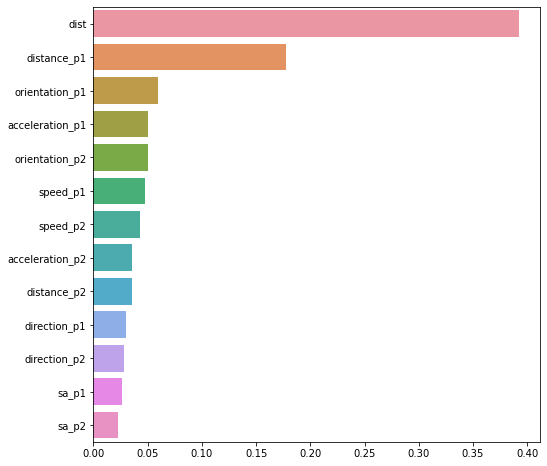

In [41]:
import seaborn as sns
importances = model.feature_importances_
sort = np.argsort(importances)[::-1]
f = plt.figure(figsize=(8,8))

sns.barplot(y=model.feature_names_in_[sort], x=model.feature_importances_[sort])
plt.show()